# Data preparation, transformation and cleaning

In [1]:
# Importing libraries and functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline
# Creating folder for chart images
!mkdir img

In [2]:
# Set color scheme for all charts
colors = ['#F2DCB3', '#EED5A0', '#E6C98A', '#DEC074', '#D6B35E', '#CEA748', '#C69A32', '#B58C28', '#A57D1F', '#954F15', '#85420D']

In [3]:
# Creating dataframes
episodes = pd.read_csv('the_walking_dead_episodes.csv')
imdb = pd.read_csv('the_walking_dead_imdb.csv')

In [4]:
# Observing frist and last 4 rows of dataframe `episodes`
episodes

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,us_viewers
0,1,1,1,Days Gone Bye,Frank Darabont,Teleplay by: Frank Darabont,2010-10-31,5350000.0
1,1,2,2,Guts,Michelle MacLaren,Frank Darabont,2010-11-07,4710000.0
2,1,3,3,Tell It to the Frogs,Gwyneth Horder-Payton,Story by: Charles H. Eglee & Jack LoGiudiceTel...,2010-11-14,5070000.0
3,1,4,4,Vatos,Johan Renck,Robert Kirkman,2010-11-21,4750000.0
4,1,5,5,Wildfire,Ernest Dickerson,Glen Mazzara,2010-11-28,5560000.0
...,...,...,...,...,...,...,...,...
172,11,20,173,What's Been Lost,Aisha Tyler,Erik Mountain,2022-10-16,1360000.0
173,11,21,174,Outpost 22,Tawnia McKiernan,Jim Barnes,2022-10-23,1500000.0
174,11,22,175,Faith,Rose Troche,Nicole Mirante-Matthews & Magali Lozano,2022-10-30,1390000.0
175,11,23,176,Family,Sharat Raju,Magali Lozano & Erik Mountain & Kevin Deiboldt,2022-11-06,1470000.0


In [5]:
# Observing frist and last 4 rows of dataframe `imdb`
imdb

,season,episode_num,title,original_air_date,imdb_rating,total_votes,desc
0,1,1,Days Gone Bye,2010-10-31,9.2,27463,Deputy Sheriff Rick Grimes awakens from a coma...
1,1,2,Guts,2010-11-07,8.6,17278,"In Atlanta, Rick is rescued by a group of surv..."
2,1,3,Tell It to the Frogs,2010-11-14,8.2,15815,Rick is reunited with Lori and Carl but soon d...
3,1,4,Vatos,2010-11-21,8.5,15449,"Rick, Glenn, Daryl and T-Dog come across a gro..."
4,1,5,Wildfire,2010-11-28,8.1,14856,"After the attack on the camp, Rick leads the s..."
...,...,...,...,...,...,...,...
172,11,20,What's Been Lost,2022-10-16,7.3,4474,Daryl and Carol search for their disappeared f...
173,11,21,Outpost 22,2022-10-23,7.2,4363,The survivors track a convoy to a mysterious d...
174,11,22,Faith,2022-10-30,7.9,4891,Ezekiel and Negan plan a work camp revolt; Eug...
175,11,23,Family,2022-11-06,8.6,6483,"Reunited, the group heads back to the commonwe..."


In [6]:
# Getting shape of both dataframes
print('Shape of IMDB dataset: ' + str(imdb.shape))
print('Shape of Episodes dataset: ' + str(episodes.shape))

Shape of IMDB dataset: (177, 7)
Shape of Episodes dataset: (177, 8)


In [7]:
# Merging dataframes `episodes` and `imdb` into `twd_dataset` dataframe
twd_dataset = pd.merge(episodes, imdb)

In [8]:
# Check shape of merged dataframe `twd_dataset`
twd_dataset.shape

(177, 12)

In [9]:
# Checking first and last 4 rows of merged dataset `twd_dataset`
twd_dataset

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,us_viewers,episode_num,imdb_rating,total_votes,desc
0,1,1,1,Days Gone Bye,Frank Darabont,Teleplay by: Frank Darabont,2010-10-31,5350000.0,1,9.2,27463,Deputy Sheriff Rick Grimes awakens from a coma...
1,1,2,2,Guts,Michelle MacLaren,Frank Darabont,2010-11-07,4710000.0,2,8.6,17278,"In Atlanta, Rick is rescued by a group of surv..."
2,1,3,3,Tell It to the Frogs,Gwyneth Horder-Payton,Story by: Charles H. Eglee & Jack LoGiudiceTel...,2010-11-14,5070000.0,3,8.2,15815,Rick is reunited with Lori and Carl but soon d...
3,1,4,4,Vatos,Johan Renck,Robert Kirkman,2010-11-21,4750000.0,4,8.5,15449,"Rick, Glenn, Daryl and T-Dog come across a gro..."
4,1,5,5,Wildfire,Ernest Dickerson,Glen Mazzara,2010-11-28,5560000.0,5,8.1,14856,"After the attack on the camp, Rick leads the s..."
...,...,...,...,...,...,...,...,...,...,...,...,...
172,11,20,173,What's Been Lost,Aisha Tyler,Erik Mountain,2022-10-16,1360000.0,20,7.3,4474,Daryl and Carol search for their disappeared f...
173,11,21,174,Outpost 22,Tawnia McKiernan,Jim Barnes,2022-10-23,1500000.0,21,7.2,4363,The survivors track a convoy to a mysterious d...
174,11,22,175,Faith,Rose Troche,Nicole Mirante-Matthews & Magali Lozano,2022-10-30,1390000.0,22,7.9,4891,Ezekiel and Negan plan a work camp revolt; Eug...
175,11,23,176,Family,Sharat Raju,Magali Lozano & Erik Mountain & Kevin Deiboldt,2022-11-06,1470000.0,23,8.6,6483,"Reunited, the group heads back to the commonwe..."


In [10]:
# Removing duplicit row from dataset
twd_dataset = twd_dataset.drop(['episode_num'], axis= 'columns')

In [11]:
# Checking if row was removed
twd_dataset.shape

(177, 11)

In [12]:
# Renaming column `desc` into `episode_synopsis`
twd_dataset.rename(columns = {'desc': 'episode_synopsis'}, inplace = True)

In [13]:
# Getting basic dataframe informations
twd_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   season                 177 non-null    int64  
 1   episode_num_in_season  177 non-null    int64  
 2   episode_num_overall    177 non-null    int64  
 3   title                  177 non-null    object 
 4   directed_by            177 non-null    object 
 5   written_by             177 non-null    object 
 6   original_air_date      177 non-null    object 
 7   us_viewers             177 non-null    float64
 8   imdb_rating            177 non-null    float64
 9   total_votes            177 non-null    int64  
 10  episode_synopsis       177 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 15.3+ KB


In [14]:
# Checking for duplicate entries
twd_dataset.duplicated().sum()

0

In [15]:
# Information about numerical columns
display(twd_dataset.describe())

,season,episode_num_in_season,episode_num_overall,us_viewers,imdb_rating,total_votes
count,177.000000,177.000000,177.000000,1.770000e+02,177.000000,177.000000
mean,6.711864,9.135593,89.000000,8.137966e+06,7.915819,11266.056497
std,3.078799,5.490046,51.239633,4.581610e+06,0.816922,5123.780686
min,1.000000,1.000000,1.000000,1.190000e+06,4.100000,4325.000000
25%,4.000000,5.000000,45.000000,3.660000e+06,7.400000,7653.000000
50%,7.000000,9.000000,89.000000,7.920000e+06,7.900000,11220.000000
75%,10.000000,13.000000,133.000000,1.238000e+07,8.500000,13039.000000
max,11.000000,24.000000,177.000000,1.729000e+07,9.600000,42427.000000


In [16]:
# Information about non numerical columns
display(twd_dataset.describe(include = 'object'))

,title,directed_by,written_by,original_air_date,episode_synopsis
count,177,177,177,177,177
unique,177,55,69,176,177
top,Days Gone Bye,Greg Nicotero,Angela Kang,2022-10-02,Deputy Sheriff Rick Grimes awakens from a coma...
freq,1,37,15,2,1


In [17]:
# Checking for NULL or NA values
twd_dataset.isna().apply(pd.Series.value_counts)

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,us_viewers,imdb_rating,total_votes,episode_synopsis
False,177,177,177,177,177,177,177,177,177,177,177


In [18]:
# Changing data types of `us_viewers` form 'float64' to 'int64' and `original_air_date` from 'object' to 'datetime64'
twd_dataset['us_viewers'] = twd_dataset['us_viewers'].astype('int')
twd_dataset['original_air_date'] = pd.to_datetime(twd_dataset['original_air_date'])

In [19]:
# Verifying data types
twd_dataset.dtypes

season                            int64
episode_num_in_season             int64
episode_num_overall               int64
title                            object
directed_by                      object
written_by                       object
original_air_date        datetime64[ns]
us_viewers                        int64
imdb_rating                     float64
total_votes                       int64
episode_synopsis                 object
dtype: object

In [20]:
# Displaying number of unique values from each column with values

cols = twd_dataset.columns.tolist()

for stat in cols:
  print('\n' + str(stat))
  print(twd_dataset[stat].unique())
  print('Number of unique values: ' + str(twd_dataset[stat].nunique()))


season
[ 1  2  3  4  5  6  7  8  9 10 11]
Number of unique values: 11

episode_num_in_season
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Number of unique values: 24

episode_num_overall
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177]
Number of unique values: 177

title
['Days Gone Bye' 'Guts' 'Tel

In [21]:
# Setting same conjunction between writters
twd_dataset['written_by'].replace('&', 'and', inplace = True, regex = True)

In [22]:
# Separating names of rirectors
twd_dataset.loc[twd_dataset['directed_by'] == 'Ernest DickersonGwyneth Horder-Payton', 'directed_by'] = 'Ernest Dickerson and Gwyneth Horder-Payton'

In [23]:
# Fixing name
twd_dataset.loc[twd_dataset['written_by'] == 'David Leslie Johnson', 'written_by'] = 'David Leslie Johnson-McGoldrick'

# Setting same conjunction between remaining writters
twd_dataset.loc[twd_dataset['written_by'] == 'Teleplay by: Frank Darabont', 'written_by'] = 'Frank Darabont'
twd_dataset.loc[twd_dataset['written_by'] == 'Story by: Angela KangTeleplay by: Corey Reed and Jim Barnes', 'written_by'] = 'Angela Kang and Corey Reed and Jim Barnes'
twd_dataset.loc[twd_dataset['written_by'] == 'Story by: Charles H. Eglee and Jack LoGiudiceTeleplay by: Charles H. Eglee and Jack LoGiudice and Frank Darabont', 'written_by'] = 'Charles H. Eglee and Jack LoGiudice and Frank Darabont'
twd_dataset.loc[twd_dataset['written_by'] == 'Story by: Corey ReedTeleplay by: Corey Reed and Kevin Deiboldt', 'written_by'] = 'Corey Reed and Kevin Deiboldt'
twd_dataset.loc[twd_dataset['written_by'] == 'Story by: Jim Barnes and Eli Jorné and Corey ReedTeleplay by: Corey Reed', 'written_by'] = 'Jim Barnes and Eli Jorné and Corey Reed'
twd_dataset.loc[twd_dataset['written_by'] == 'Story by: Scott M. Gimple and Channing PowellTeleplay by: Channing Powell', 'written_by'] = 'Scott M. Gimple and Channing Powell'
twd_dataset.loc[twd_dataset['written_by'] == 'Story by: Scott M. Gimple and David Leslie Johnson-McGoldrick and Angela KangTeleplay by: David Leslie Johnson-McGoldrick and Angela Kang', 'written_by'] = 'Scott M. Gimple and David Leslie Johnson-McGoldrick and Angela Kang'
twd_dataset.loc[twd_dataset['written_by'] == 'Story by: Scott M. Gimple and Matthew NegreteTeleplay by: Matthew Negrete', 'written_by'] = 'Scott M. Gimple and Matthew Negrete'

In [24]:
# Again check for unique vaules
for stat in cols:
  print('\n' + str(stat))
  print('Number of unique values: ' + str(twd_dataset[stat].nunique()))


season
Number of unique values: 11

episode_num_in_season
Number of unique values: 24

episode_num_overall
Number of unique values: 177

title
Number of unique values: 177

directed_by
Number of unique values: 55

written_by
Number of unique values: 66

original_air_date
Number of unique values: 176

us_viewers
Number of unique values: 162

imdb_rating
Number of unique values: 35

total_votes
Number of unique values: 176

episode_synopsis
Number of unique values: 177


In [25]:
# Saving dataframe into .csv
twd_dataset.to_csv('TWD_dataset.csv', encoding = 'utf-8', index = False)

# Episodes

In [26]:
# Extracting unique season values from the `season` column of the `twd_dataset` dataframe
season = twd_dataset['season'].unique()
# Counting the number of episodes per season and sorting them
episode = twd_dataset['season'].value_counts(sort = False)

### Episode distribution

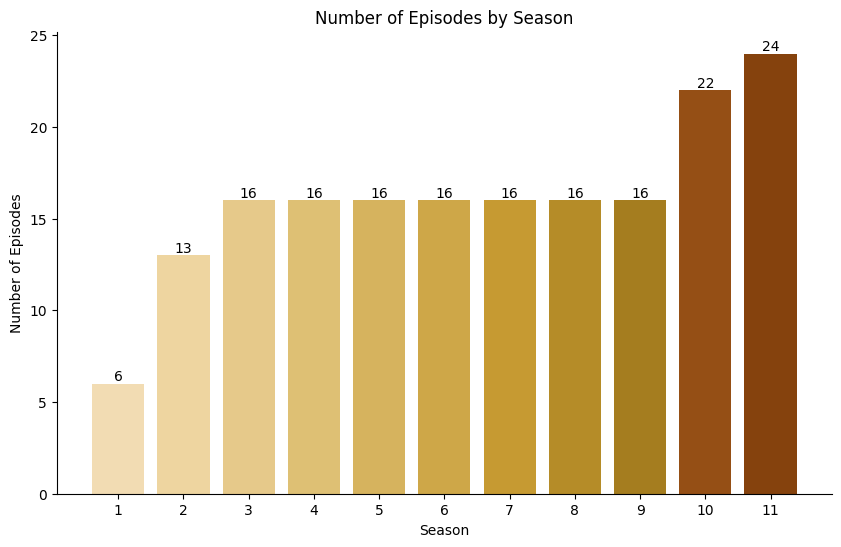

In [27]:
# Creating a bar plot to visualize the number of episodes per season
ax = plt.bar(season, episode, color = colors)
# Getting the current Axes instance
ax = plt.gca()

# Removing the top and right spines from the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adding text labels for each bar to display the episode count
for i, value in enumerate(episode):
    plt.text(i + 1, value, str(value), ha='center', va='bottom')

# Adding labels and title to the plot and adjusting X-axis elements
plt.xlabel('Season')
plt.ylabel('Number of Episodes')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11])
plt.title('Number of Episodes by Season')

# Setting the figure size
plt.gcf().set_size_inches(10, 6)
# Setting aspect ratio to 'auto' for better visualization
plt.gca().set_aspect('auto')

# Saving the plot as an image
plt.savefig('img/number_of_episodes_by_season.png')
# Displaying the plot
plt.show()

### Average number of episodes of the series.

In [28]:
# Average episode number per season
print((twd_dataset['episode_num_overall'].max()/twd_dataset['season'].max()).round(2))

16.09


# IMDB ratings

### Average IMDB rating of the series

In [29]:
# Average IMDB rating
print(twd_dataset['imdb_rating'].mean().round(2))

7.92


### IMDB rating across the series.

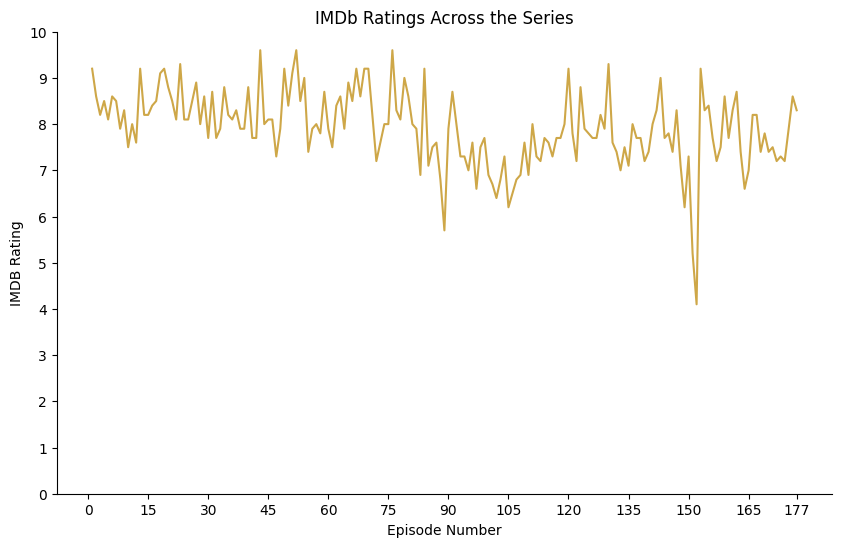

In [30]:
# Plotting IMDb ratings across the series using episode numbers
ax = plt.plot(twd_dataset.episode_num_overall,twd_dataset.imdb_rating, linestyle='-', color = colors[5])
# Getting the current `axes` instance
ax = plt.gca()

# Removing the top and right spines from the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Setting x-axis and y-axis ticks
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.xticks([0,15,30,45,60,75,90,105,120,135,150,165,177])

# Adding labels and title to the plot
plt.xlabel('Episode Number')
plt.ylabel('IMDB Rating')
plt.title('IMDb Ratings Across the Series')

# Setting the figure size
plt.gcf().set_size_inches(10, 6)
# Setting aspect ratio to `auto` for better visualization
plt.gca().set_aspect('auto')

# Saving the plot as an image
plt.savefig('img/imdb_rating_across_the_series.png')
# Displaying the plot
plt.show()

### IMDB rating across the seasons.

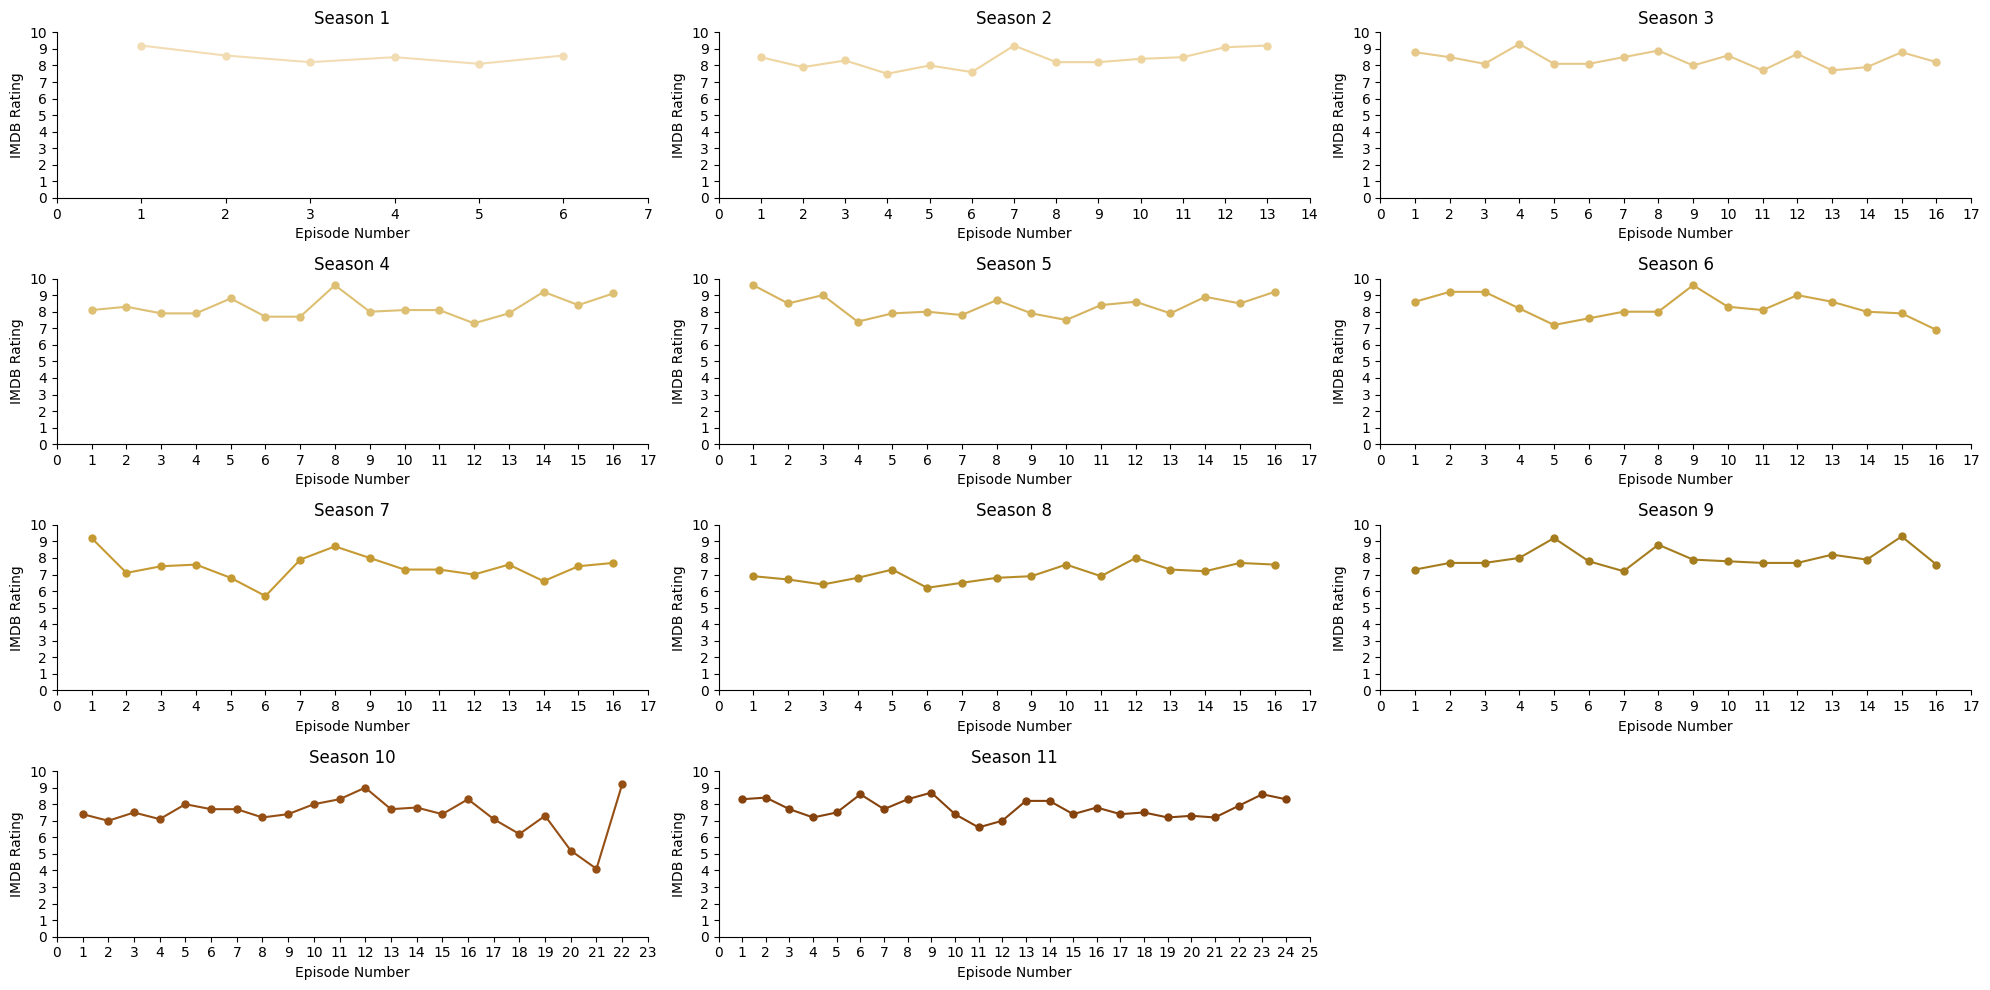

In [31]:
# Getting unique season numbers and converting them to list
per_season = twd_dataset['season'].unique().tolist()
# Calculating the number of seasons
num_seasons = len(per_season)

# Setting up subplot grid
num_rows = 4
num_cols = (num_seasons + num_rows - 1) // num_rows
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))

# Looping over seasons
for i, season in enumerate(per_season):

    number_of_episodes = twd_dataset['season'][twd_dataset['season'] == season].count()
    ax = axes[i // num_cols, i % num_cols]

    # Removing top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Plotting IMDb ratings for episodes in current season
    ax.plot(twd_dataset['episode_num_in_season'][twd_dataset['season'] == season], twd_dataset['imdb_rating'][twd_dataset['season'] == season], color=colors[i], marker='o', ms=5)

    # Setting labels, title and limits for the subplot
    ax.set_xlabel('Episode Number')
    ax.set_ylabel('IMDB Rating')
    ax.set_xlim([1, number_of_episodes])
    ax.set_ylim([0,10])
    ax.set_title('Season ' + str(season))
    number_of_episodes = range(number_of_episodes)

    # Setting ticks for x and y axes
    ax.set_xticks(range(len(number_of_episodes) + 2))
    ax.set_yticks([0,1,2,3,4,5,6,7,8,9,10])

# Removing unused subplot
if num_seasons < num_rows * num_cols:
    for i in range(num_seasons, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

# Adjusting layout
plt.tight_layout()
# Saving the plot as an image
plt.savefig('img/imdb_rating_across_the_seasons.png')
# Displaying the plot
plt.show()

### Average IMDB ratings across seasons with MIN and MAX rating for each season.

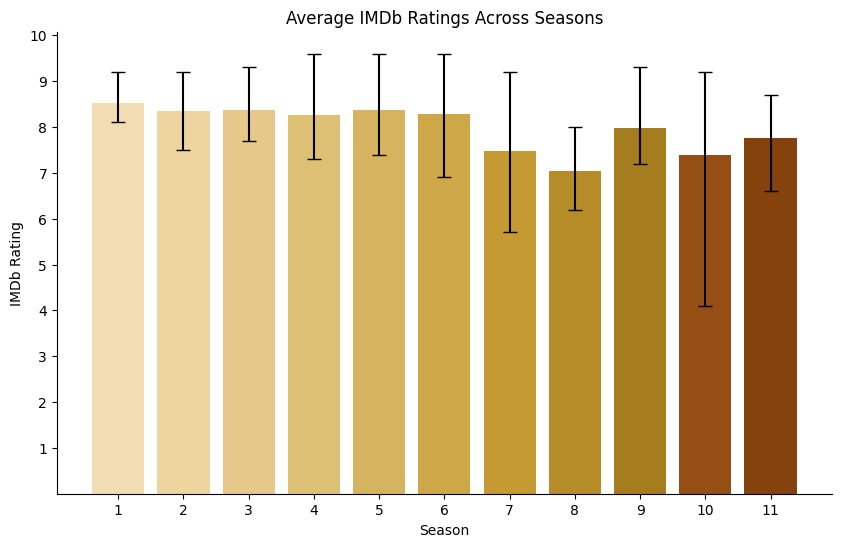

In [32]:
# Calculating average IMDb ratings and range (min and max) for each season
averages = twd_dataset.groupby('season')['imdb_rating'].mean()
errors = twd_dataset.groupby('season')['imdb_rating'].agg(['min', 'max'])

# Creating a bar chart, showing average IMDB ratings across seasons with error bars to show MAX and MIN values
ax = plt.bar(averages.index, averages, yerr=[averages - errors['min'], errors['max'] - averages], capsize=5, color = colors)

# Getting the current `axes` instance
ax = plt.gca()

# Removing the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Setting x-axis and y-axis ticks
plt.yticks([1,2,3,4,5,6,7,8,9,10])
plt.xticks([1,2,3,4,5,6,7,8,9,10,11])

# Adding labels and title to the plot
plt.xlabel('Season')
plt.ylabel('IMDb Rating')
plt.title('Average IMDb Ratings Across Seasons')

# Setting the figure size
plt.gcf().set_size_inches(10, 6)
# Setting aspect ratio to 'auto' for better visualization
plt.gca().set_aspect('auto')

# Saving the plot as an image
plt.savefig('img/average_imdb_rating_across_seasons.png')
# Displaying the plot
plt.show()

### Top 15 best rated episodes.

In [33]:
# Sorting the `twd_dataset` dataframe by IMDB rating in descending order
sorted_twd_dataset = twd_dataset.sort_values(by='imdb_rating', ascending = False)
# Selecting specific columns from the sorted dataframe
selected_columns = sorted_twd_dataset[['season', 'episode_num_in_season', 'title', 'original_air_date', 'imdb_rating']]
# Displaying the first 15 rows of the selected columns
selected_columns[:15]

,season,episode_num_in_season,title,original_air_date,imdb_rating
51,5,1,No Sanctuary,2014-10-12,9.6
42,4,8,Too Far Gone,2013-12-01,9.6
75,6,9,No Way Out,2016-02-14,9.6
129,9,15,The Calm Before,2019-03-24,9.3
22,3,4,Killer Within,2012-11-04,9.3
0,1,1,Days Gone Bye,2010-10-31,9.2
18,2,13,Beside the Dying Fire,2012-03-18,9.2
48,4,14,The Grove,2014-03-16,9.2
66,5,16,Conquer,2015-03-29,9.2
68,6,2,JSS,2015-10-18,9.2


### Top 15 worst rated episodes.

In [34]:
# Sorting the `twd_dataset` dataframe by IMDB rating in ascending order
sorted_twd_dataset = twd_dataset.sort_values(by='imdb_rating', ascending = False)
# Selecting specific columns from the sorted dataframe
selected_columns = sorted_twd_dataset[['season', 'episode_num_in_season', 'title', 'original_air_date', 'imdb_rating']]
# Displaying the first 15 rows of the selected columns sorted by `imdb_rating`
selected_columns[-15:].sort_values(by = 'imdb_rating')

,season,episode_num_in_season,title,original_air_date,imdb_rating
151,10,21,Diverged,2021-03-25,4.1
150,10,20,Splinter,2021-03-18,5.2
88,7,6,Swear,2016-11-27,5.7
104,8,6,"The King, the Widow and Rick",2017-11-26,6.2
148,10,18,Find Me,2021-03-04,6.2
101,8,3,Monsters,2017-11-05,6.4
105,8,7,Time for After,2017-12-03,6.5
96,7,14,The Other Side,2017-03-19,6.6
163,11,11,Rogue Element,2022-02-27,6.6
100,8,2,The Damned,2017-10-29,6.7


### Distribution of the IMDB ratings.

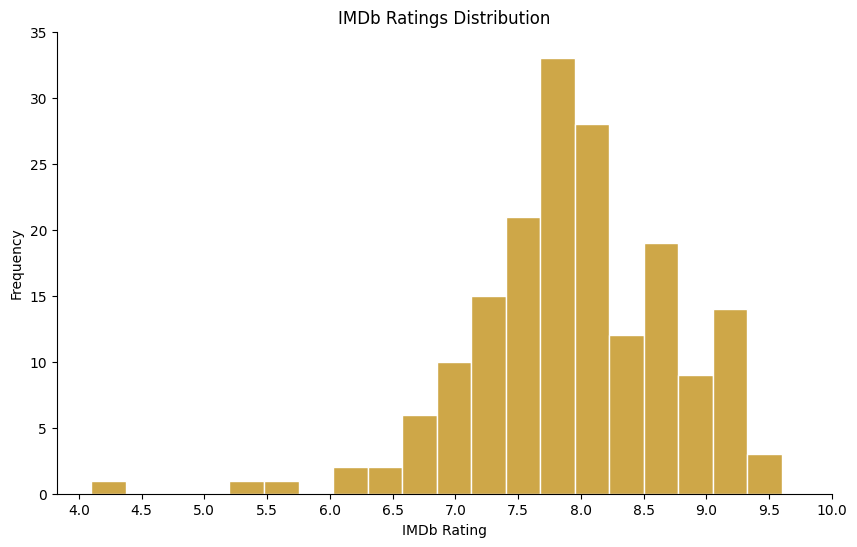

In [35]:
# Creating a histogram of IMDB ratings with 20 bins
plt.hist(twd_dataset['imdb_rating'], bins=20, color =colors[5] , edgecolor='white')

# Setting x-axis and y-axis ticks
plt.xticks([4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10])
plt.yticks([0, 5, 10, 15, 20, 25, 30, 35])

# Adding labels and title to the plot
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')
plt.title('IMDb Ratings Distribution')

# Removing top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Setting the figure size
plt.gcf().set_size_inches(10, 6)
# Setting aspect ratio to 'auto' for better visualization
plt.gca().set_aspect('auto')

# Saving the plot as an image
plt.savefig('img/imdb_rating_distribution.png')
# Displaying the plot
plt.show()

# US viewership

### Average US viewers of the series

In [36]:
# Average viewership
print(twd_dataset['us_viewers'].mean().round(2))

8137966.09


### US viewership across the series.

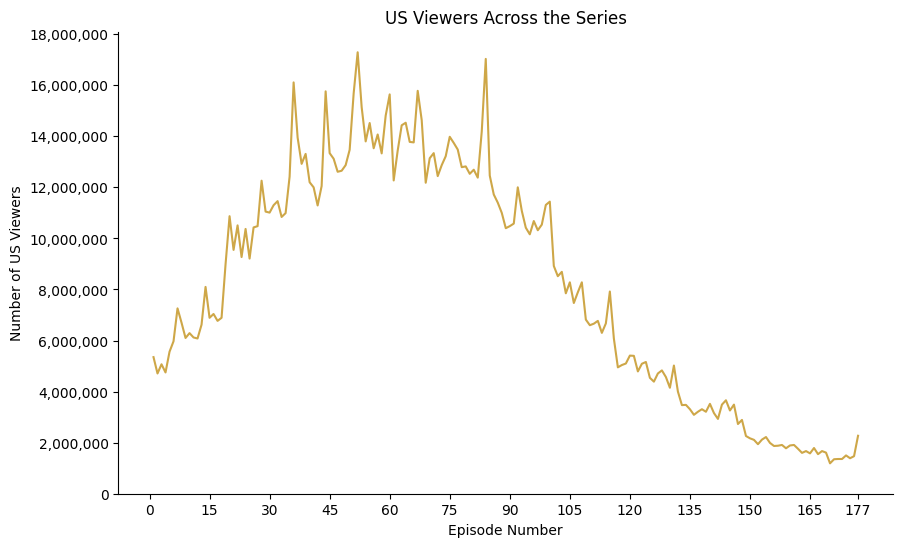

In [37]:
# Plotting the number of US viewers across the series against episode numbers
ax = plt.plot(twd_dataset.episode_num_overall,twd_dataset.us_viewers, linestyle='-', color = '#CEA748')
# Getting the current Axes instance
ax = plt.gca()

# Removing the top and right spines from the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Formatting y-axis labels to display numbers with commas for thousands separator
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Setting x-axis and y-axis ticks
plt.yticks([0, 2000000, 4000000, 6000000, 8000000, 10000000, 12000000, 14000000, 16000000, 18000000])
plt.xticks([0,15,30,45,60,75,90,105,120,135,150,165,177])

# Adding labels and title to the plot
plt.xlabel('Episode Number')
plt.ylabel('Number of US Viewers')
plt.title('US Viewers Across the Series')

# Setting the figure size
plt.gcf().set_size_inches(10, 6)
# Setting aspect ratio to 'auto' for better visualization
plt.gca().set_aspect('auto')

# Saving the plot as an image
plt.savefig('img/us_viewers_across_the_series.png')
# Displaying the plot
plt.show()

### US viewership across the seasons.

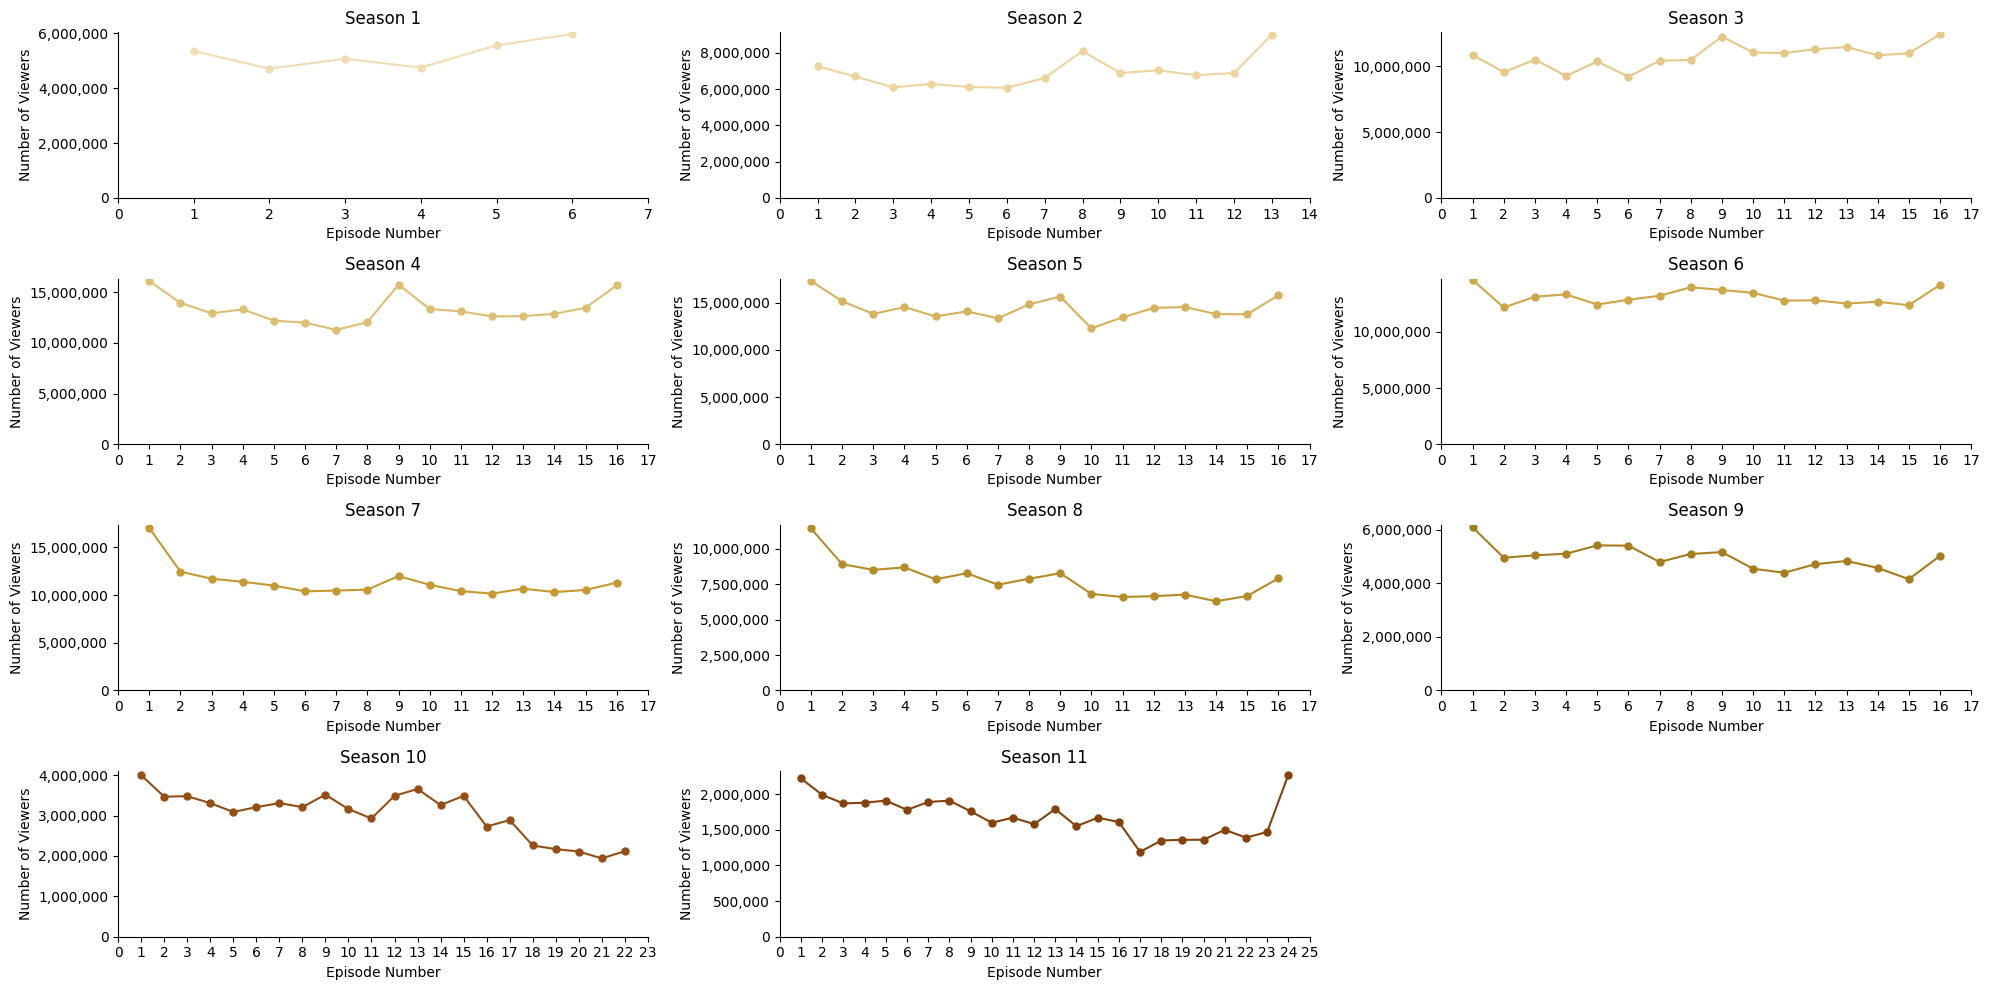

In [38]:
# Getting unique seasons numbers and converting them to list
per_season = twd_dataset['season'].unique().tolist()
# Calculating the number of seasons
num_seasons = len(per_season)

# Setting up subplot grid
num_rows = 4
num_cols = (num_seasons + num_rows - 1) // num_rows
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))

# Looping over seasons
for i, season in enumerate(per_season):
    # Counting number of episodes in current season
    number_of_episodes = twd_dataset['season'][twd_dataset['season'] == season].count()
    ax = axes[i // num_cols, i % num_cols]

    # Removing top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Plotting number of US viewers for episodes in current season
    ax.plot(twd_dataset['episode_num_in_season'][twd_dataset['season'] == season], twd_dataset['us_viewers'][twd_dataset['season'] == season], color=colors[i], marker='o', ms=5)

    # Setting labels, title and for the subplot
    ax.set_xlabel('Episode Number')
    ax.set_ylabel('Number of Viewers')
    ax.set_xlim([1, number_of_episodes])
    ax.set_ylim(ymin=0)
    ax.set_title('Season ' + str(season))

    # Setting custom x-axis ticks with rotation
    number_of_episodes = range(number_of_episodes)
    ax.set_xticks(range(len(number_of_episodes) + 2))
    plt.xticks(rotation=45)

    # Formatting y-axis labels to display numbers with commas for thousands separator
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Removing unused subplot
if num_seasons < num_rows * num_cols:
    for i in range(num_seasons, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

# Adjusting layout
plt.tight_layout()
# Saving the plot as an image
plt.savefig('img/us_viewers_across_the_seasons.png')
# Displaying the plot
plt.show()

### Average US viewership across seasons with MIN and MAX rating for each season.

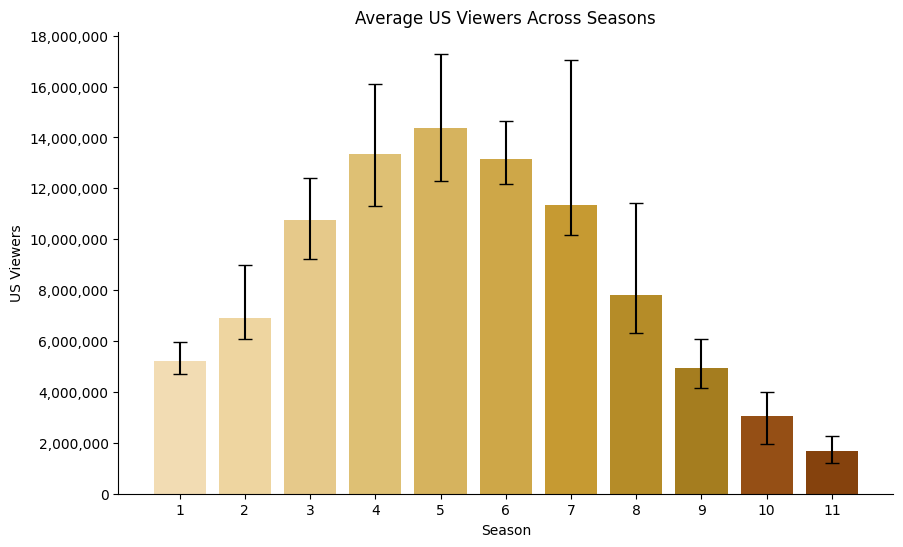

In [39]:
# Calculating average US viewership and range (min and max) for each season
averages = twd_dataset.groupby('season')['us_viewers'].mean()
errors = twd_dataset.groupby('season')['us_viewers'].agg(['min', 'max'])

# Creating a bar chart, showing average US viewership across seasons with error bars to show MAX and MIN values
ax = plt.bar(averages.index, averages, yerr=[averages - errors['min'], errors['max'] - averages], capsize=5, color = colors)

# Getting the current `axes` instance
ax = plt.gca()

# Removing the top and right spines from the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Setting x-axis and y-axis ticks
plt.yticks([0, 2000000, 4000000, 6000000, 8000000, 10000000, 12000000, 14000000, 16000000, 18000000])
plt.xticks([1,2,3,4,5,6,7,8,9,10,11])

# Formatting y-axis labels to display numbers with commas for thousands separator
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Adding labels and title to the plot
plt.xlabel('Season')
plt.ylabel('US Viewers')
plt.title('Average US Viewers Across Seasons')

# Setting the figure size
plt.gcf().set_size_inches(10, 6)
# Setting aspect ratio to 'auto' for better visualization
plt.gca().set_aspect('auto')

# Saving the plot as an image
plt.savefig('img/average_us_viewers_across_seasons.png')
# Displaying the plot
plt.show()

### Top 15 episodes with highest US viewership.

In [40]:
# Sorting the `twd_dataset` dataframe by US viewership in descending order
sorted_twd_dataset = twd_dataset.sort_values(by = 'us_viewers', ascending = False)
# Selecting specific columns from the sorted dataframe
selected_columns = sorted_twd_dataset[['season', 'episode_num_in_season', 'title', 'original_air_date', 'imdb_rating', 'us_viewers']]
# Displaying the first 15 rows of the selected columns
selected_columns[:15]

,season,episode_num_in_season,title,original_air_date,imdb_rating,us_viewers
51,5,1,No Sanctuary,2014-10-12,9.6,17290000
83,7,1,The Day Will Come When You Won't Be,2016-10-23,9.2,17030000
35,4,1,30 Days Without an Accident,2013-10-13,8.1,16110000
66,5,16,Conquer,2015-03-29,9.2,15780000
43,4,9,After,2014-02-09,8.0,15760000
50,4,16,A,2014-03-30,9.1,15680000
59,5,9,What Happened and What's Going On,2015-02-08,7.9,15640000
52,5,2,Strangers,2014-10-19,8.5,15140000
58,5,8,Coda,2014-11-30,8.7,14810000
67,6,1,First Time Again,2015-10-11,8.6,14630000


### Top 15 episodes with lowest US viewership.

In [41]:
# Sorting the `twd_dataset` dataframe by US viewership in ascending order
sorted_twd_dataset = twd_dataset.sort_values(by = 'us_viewers', ascending = False)
# Selecting specific columns from the sorted dataframe
selected_columns = sorted_twd_dataset[['season', 'episode_num_in_season', 'title', 'original_air_date', 'imdb_rating', 'us_viewers']]
# Displaying the first 15 rows of the selected columns sorted by `us_viewers`
selected_columns[-15:].sort_values(by = 'us_viewers')

,season,episode_num_in_season,title,original_air_date,imdb_rating,us_viewers
169,11,17,Lockdown,2022-10-02,7.4,1190000
170,11,18,A New Deal,2022-10-02,7.5,1350000
171,11,19,Variant,2022-10-09,7.2,1360000
172,11,20,What's Been Lost,2022-10-16,7.3,1360000
174,11,22,Faith,2022-10-30,7.9,1390000
175,11,23,Family,2022-11-06,8.6,1470000
173,11,21,Outpost 22,2022-10-23,7.2,1500000
166,11,14,The Rotten Core,2022-03-20,8.2,1550000
164,11,12,The Lucky Ones,2022-03-06,7.0,1580000
162,11,10,New Haunts,2022-02-20,7.4,1600000


### Distribution of the US viewership.

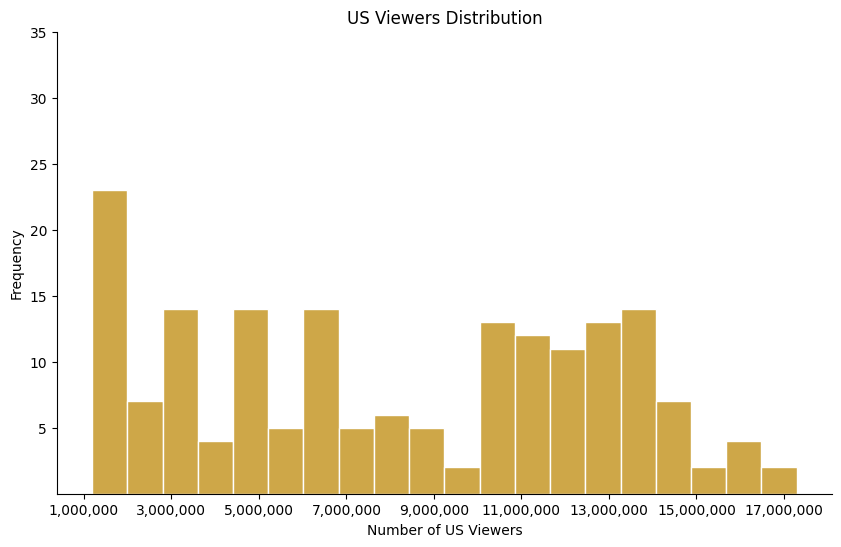

In [42]:
# Creating a histogram of US viewers with 20 bins
plt.hist(twd_dataset['us_viewers'], bins=20, color=colors[5], edgecolor='white')

# Formatting x-axis labels to display numbers with commas for thousands separator
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Setting custom x-axis and y-axis ticks
plt.xticks([1000000, 3000000, 5000000, 7000000, 9000000, 11000000, 13000000, 15000000, 17000000])
plt.yticks([5, 10, 15, 20, 25, 30, 35])

# Adding labels and title to the plot
plt.xlabel('Number of US Viewers')
plt.ylabel('Frequency')
plt.title('US Viewers Distribution')

# Removing top and right spines from the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Setting the figure size
plt.gcf().set_size_inches(10, 6)
# Setting aspect ratio to 'auto' for better visualization
plt.gca().set_aspect('auto')

# Saving the plot as an image
plt.savefig('img/us_viewers_distribution.png')
# Displaying the plot
plt.show()

# Trends in release date of episodes

In [43]:
# Adding a column for the day of the week when each episode aired
twd_dataset['day_of_week'] = twd_dataset['original_air_date'].dt.weekday

# Mapping the numeric day of the week to the corresponding day name
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
twd_dataset['day_name'] = twd_dataset['day_of_week'].map(lambda x: days_of_week[x])

# Counting the occurrences of each day of the week
day_counts = twd_dataset['day_name'].value_counts()
# Printing the counts
print(day_counts)

day_name
Sunday      172
Thursday      5
Name: count, dtype: int64


In [44]:
# Defining specific air date
unsual_air_date = 'Thursday'

# Displaying episodes that aired on the specified day
display(twd_dataset[twd_dataset['day_name'] == unsual_air_date])

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,us_viewers,imdb_rating,total_votes,episode_synopsis,day_of_week,day_name
146,10,16,147,A Certain Doom,Greg Nicotero,Jim Barnes and Eli Jorné and Corey Reed,2020-10-01,2730000,8.3,8369,Beta engages the final battle of the Whisperer...,3,Thursday
148,10,18,149,Find Me,David Boyd,Nicole Mirante-Matthews,2021-03-04,2260000,6.2,7570,Daryl and Carol find an old cabin that takes D...,3,Thursday
149,10,19,150,One More,Laura Belsey,Erik Mountain and Jim Barnes,2021-03-11,2170000,7.3,7477,"With Maggie's map, Gabriel and Aaron search fo...",3,Thursday
150,10,20,151,Splinter,Laura Belsey,Julia Ruchman and Vivian Tse,2021-03-18,2110000,5.2,8747,"Eugene, Ezekiel, Yumiko, and Princess are capt...",3,Thursday
151,10,21,152,Diverged,David Boyd,Heather Bellson,2021-03-25,1940000,4.1,10179,Daryl and Carol come to a fork in the road and...,3,Thursday


# Directors

### Top 10 directors.

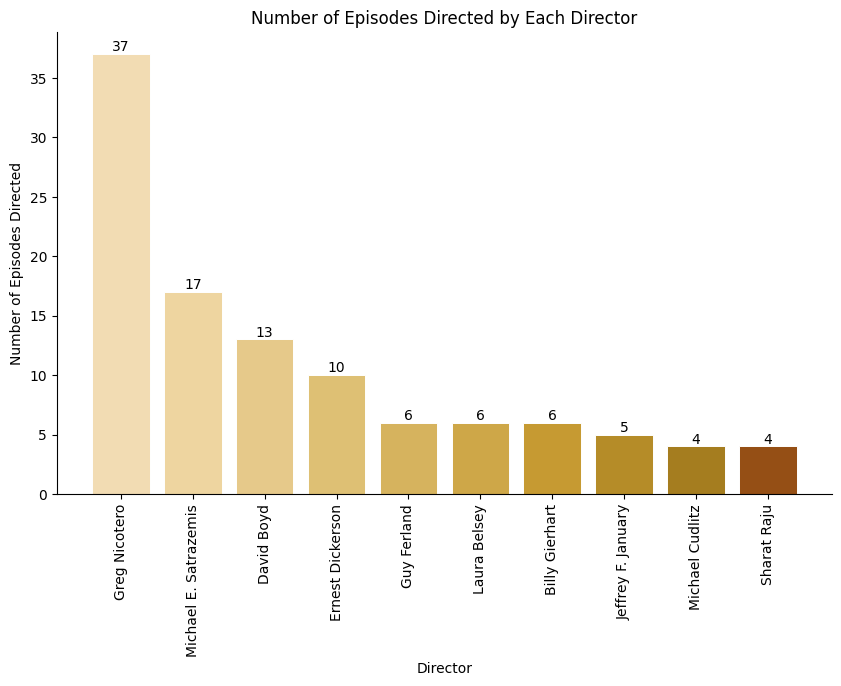

In [45]:
# Counting the number of episodes directed by each director
counts = twd_dataset['directed_by'].value_counts()

# Selecting the top 10 directors with the most directed episodes
counts_sorted = counts.sort_values(ascending=False)[:10]
names_sorted = counts_sorted.index[:10]

# Creating the bar chart
ax = plt.bar(names_sorted, counts_sorted, width=0.8, edgecolor="white", linewidth=0.7, color = colors)

# Getting the current `axes` instance
ax = plt.gca()

# Removing the top and right spines from the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adding text labels for each bar in chart
for i, value in enumerate(counts_sorted):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Setting the figure size
plt.gcf().set_size_inches(10, 6)
# Setting aspect ratio to 'auto' for better visualization
plt.gca().set_aspect('auto')

# Rotating x-axis labels for better readability
plt.xticks(rotation = 90)

# Adding labels and title to the plot
plt.xlabel('Director')
plt.ylabel('Number of Episodes Directed')
plt.title('Number of Episodes Directed by Each Director')

# Saving the plot as an image
plt.savefig('img/number_of_episodes_by_director.png')
# Displaying the plot
plt.show()

### Best and worst rated directors with at least 3 episodes directed.

In [46]:
# # Counting the number of episodes directed by each director and than selecting directors with at least three episodes directed
directors_with_at_least_3_episodes = twd_dataset['directed_by'].value_counts()[twd_dataset['directed_by'].value_counts() >= 3].index
# Filtering the dataset to include only episodes directed by these directors
filtered_directors = twd_dataset[twd_dataset['directed_by'].isin(directors_with_at_least_3_episodes)]

In [47]:
# Computing the mean IMDb rating for episodes directed by each director among those with at least three episodes directed and than sorting the directors based on their average IMDB ratings in descending order and selecting the top 10
top_directors = filtered_directors['imdb_rating'].groupby(filtered_directors['directed_by']).mean().round(2).sort_values(ascending=False).nlargest(10)

# Printing the top 10 directors with their average IMDB ratings
print(top_directors)

directed_by
Michelle MacLaren     8.97
Guy Ferland           8.57
Ernest Dickerson      8.47
Billy Gierhart        8.25
Tricia Brock          8.23
Seith Mann            8.23
Michael Slovis        8.13
Sharat Raju           8.07
Greg Nicotero         8.04
Jeffrey F. January    7.74
Name: imdb_rating, dtype: float64


In [48]:
# Computing the mean IMDb rating for episodes directed by each director among those with at least three episodes directed and than sorting the directors based on their average IMDB ratings in ascending order and selecting the top 10
worst_directors = filtered_directors['imdb_rating'].groupby(filtered_directors['directed_by']).mean().round(2).sort_values(ascending=False).nsmallest(10)

# Printing the bottom 10 directors with their average IMDB ratings
print(worst_directors)

directed_by
Michael Cudlitz          7.15
Dan Liu                  7.40
David Boyd               7.42
Rosemary Rodriguez       7.53
Michael E. Satrazemis    7.68
Alrick Riley             7.70
Laura Belsey             7.73
Jeffrey F. January       7.74
Greg Nicotero            8.04
Sharat Raju              8.07
Name: imdb_rating, dtype: float64


# Writers

### Top 10 writers.

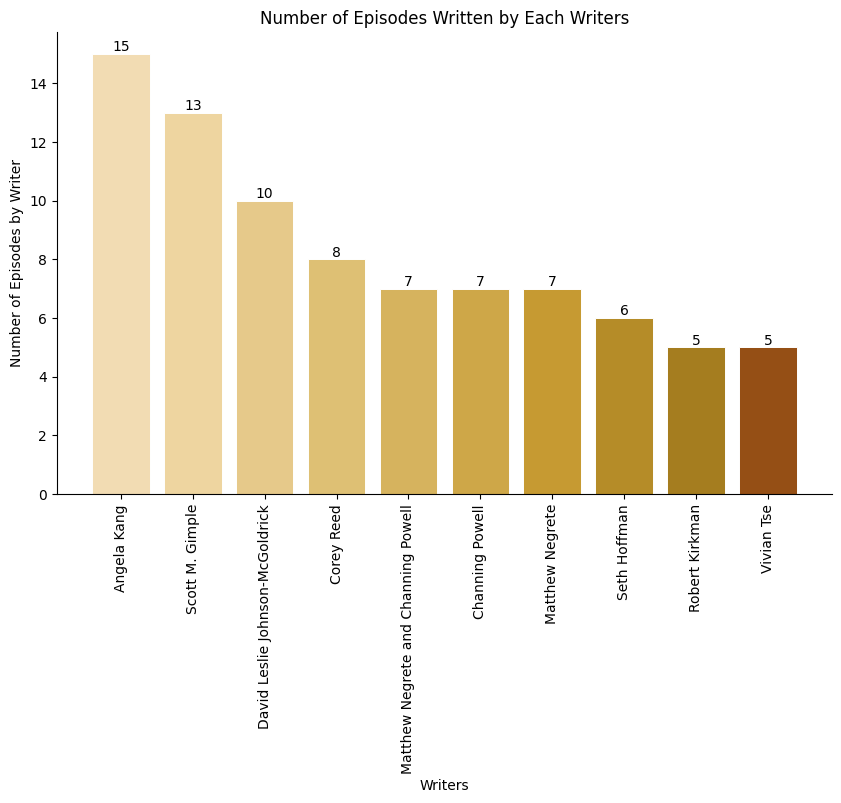

In [49]:
# Counting the number of episodes written by each writer
counts = twd_dataset['written_by'].value_counts()

# Selecting the top 10 writers with the most written episodes
counts_sorted = counts.sort_values(ascending=False)[:10]
names_sorted = counts_sorted.index[:10]

# Creating the bar chart
ax = plt.bar(names_sorted, counts_sorted, width=0.8, edgecolor="white", linewidth=0.7, color = colors)

# Getting the current `axes` instance
ax = plt.gca()

# Removing the top and right spines from the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adding text labels for each bar in chart
for i, value in enumerate(counts_sorted):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Setting the figure size
plt.gcf().set_size_inches(10, 6)
# Setting aspect ratio to 'auto' for better visualization
plt.gca().set_aspect('auto')

# Rotating x-axis labels for better readability
plt.xticks(rotation = 90)

# Adding labels and title to the plot
plt.xlabel('Writers')
plt.ylabel('Number of Episodes by Writer')
plt.title('Number of Episodes Written by Each Writers')

# Saving the plot as an image
plt.savefig('img/number_of_episodes_by_writer.png')
# Displaying the plot
plt.show()

### Best and worst rated writers with at least 3 episodes written.

In [50]:
# Counting the number of episodes written by each writer and than selecting writers with at least three episodes written
writers_with_at_least_3_episodes = twd_dataset['written_by'].value_counts()[twd_dataset['written_by'].value_counts() >= 3].index
# Filtering the dataset to include only episodes written by these writers
filtered_writers = twd_dataset[twd_dataset['written_by'].isin(writers_with_at_least_3_episodes)]

In [51]:
# Computing the mean IMDB rating for episodes written by each writer among those with at least three episodes written and than sorting the writers based on their average IMDB ratings in descending order and selecting the top 10
top_writers = filtered_writers['imdb_rating'].groupby(filtered_writers['written_by']).mean().round(2).sort_values(ascending=False).nlargest(10)

# Printing the top 10 writers with their average IMDB ratings
print(top_writers)

written_by
Seth Hoffman                           8.93
Scott M. Gimple                        8.45
Robert Kirkman                         8.36
Nichole Beattie                        8.27
Glen Mazzara                           8.25
Scott M. Gimple and Matthew Negrete    8.23
Angela Kang                            7.95
Evan Reilly                            7.95
Kevin Deiboldt                         7.90
Channing Powell                        7.87
Name: imdb_rating, dtype: float64


In [52]:
# Computing the mean IMDB rating for episodes written by each writer among those with at least three episodes written and than sorting the writers based on their average IMDB ratings in ascending order and selecting the top 10
worst_writers = filtered_writers['imdb_rating'].groupby(filtered_writers['written_by']).mean().round(2).sort_values(ascending=False).nsmallest(10)

# Printing the bottom 10 writers with their average IMDB ratings
print(worst_writers)

written_by
Heather Bellson                        6.40
Nicole Mirante-Matthews                7.05
Eddie Guzelian                         7.30
Vivian Tse                             7.36
Julia Ruchman                          7.43
Matthew Negrete and Channing Powell    7.47
David Leslie Johnson-McGoldrick        7.57
Jim Barnes                             7.57
Corey Reed                             7.78
Matthew Negrete                        7.80
Name: imdb_rating, dtype: float64


# Word cloud

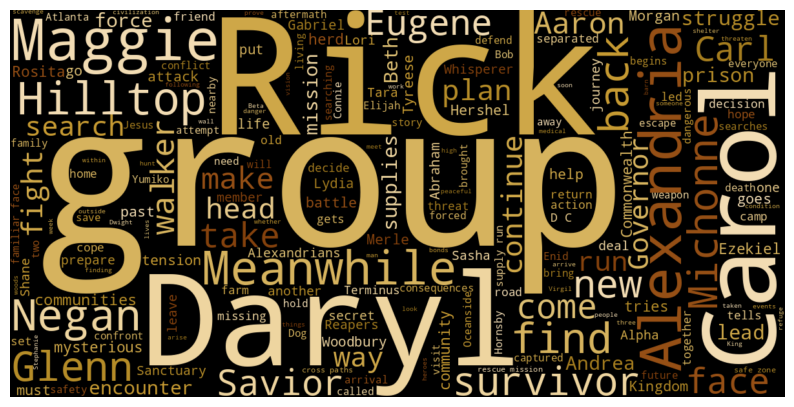

In [53]:
# Joining all episode synopses into a single text string
text = ' '.join(twd_dataset['episode_synopsis'])

# Setting up stopwords (these will be excluded from word cloud)
stopwords = set(STOPWORDS)

# Creating a WordCloud object
wc = WordCloud(
    # Background color of the word cloud
    background_color='black',
    # Set of stopwords to be excluded
    stopwords=stopwords,
    # Height and width of the word cloud image
    height=600,
    width=1200
)

# Generating the word cloud
wc.generate(text)

# Defining a function to specify colors for words in the word cloud
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = ['#F2DCB3', '#EED5A0', '#E6C98A', '#DEC074', '#D6B35E', '#CEA748', '#C69A32', '#B58C28', '#A57D1F', '#954F15', '#85420D']
    return np.random.choice(colors)

# Recoloring the word cloud using the defined color function
wc.recolor(color_func=color_func)

# Saving the word cloud as an image file
wc.to_file("wordcloud.png")

# Displaying the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()
